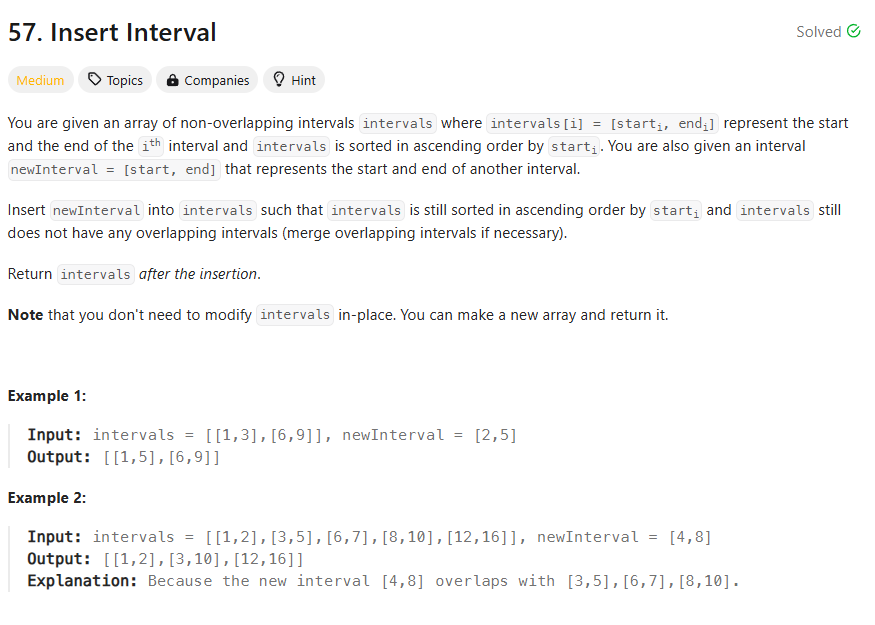

In [ ]:
# Solution 1
class Solution:
    def insert(self, intervals: List[List[int]], newInterval: List[int]) -> List[List[int]]:
        def merge(task1, task2):
            if task1[1] >= task2[0]:
                return True, [[task1[0], max(task1[1], task2[1])]]
            return False, [task1, task2]

        def bSearch(newInterval, intervals):
            s, e = 0, len(intervals)-1
            while s <= e:
                mid = (s + e) // 2
                if newInterval[0] > intervals[mid][0]:
                    s = mid + 1
                elif newInterval[0] < intervals[mid][0]:
                    e = mid - 1
                else:
                    return mid + 1
            return s

        insert_idx = bSearch(newInterval, intervals)

        if insert_idx:
            result = intervals[:insert_idx - 1]
            _, l = merge(intervals[insert_idx - 1], newInterval)
            result.extend(l)
        else:
            result = [newInterval,]
            
        for i,task in  enumerate(intervals[insert_idx:], insert_idx):
            isMerged, l = merge(result[-1], task)
            if isMerged:
                result.pop()
                result.extend(l)
            else:
                result.extend(intervals[i:])
                break
        
        return result

In [ ]:
# Solution 2
class Solution:
    def insert(self, intervals: List[List[int]], newInterval: List[int]) -> List[List[int]]:
        result = []
        i = 0
        n = len(intervals)

        while i < n and intervals[i][1] < newInterval[0]:
            result.append(intervals[i])
            i += 1

        while i < n and intervals[i][0] <= newInterval[1]:
            newInterval = [min(newInterval[0], intervals[i][0]), max(newInterval[1], intervals[i][1])]
            i += 1
        result.append(newInterval)

        result.extend(intervals[i:])
        return result